In [1]:
# Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# Import Disney data

disney_df = pd.read_csv("../CSV Resources/disney.csv")
disney_df = disney_df.set_index('Title')
disney_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Lab Rats,2012,7+,6.6,NaN
America's Funniest Home Videos,1989,7+,6.2,NaN
Brain Games,2011,7+,8.3,NaN
Jessie,2011,all,5.9,NaN
PJ Masks,2015,all,5.6,NaN


In [3]:
# Drop all data that is missing a rating

disney_df_dropped = disney_df.dropna()
disney_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
The Simpsons,1989,7+,8.7,85%
Gravity Falls,2012,7+,8.9,100%
Marvel's Runaways,2017,16+,7.0,87%
The Mandalorian,2019,7+,8.7,93%
Star Wars: The Clone Wars,2008,7+,8.2,93%


In [4]:
# Convert Rotten Tomatoes ratings from percentages to integers

disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
disney_df_dropped.head()

<ipython-input-4-d0db54cb1f03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
The Simpsons,1989,7+,8.7,85%,85
Gravity Falls,2012,7+,8.9,100%,100
Marvel's Runaways,2017,16+,7.0,87%,87
The Mandalorian,2019,7+,8.7,93%,93
Star Wars: The Clone Wars,2008,7+,8.2,93%,93


In [5]:
# Create DataFrame to highlight Disney ratings

imdb_average = disney_df['IMDB'].mean()
round_imdb_average = round(imdb_average, 2)
rotten_average = disney_df_dropped['RT'].mean()
rounded_rotten_average = round(rotten_average, 2)
age_group = disney_df['Age'].mode()
total_shows = len(disney_df)
title = disney_df.index.to_list()

disney_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = disney_df.index[0]

disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
disney_df_dropped.head(100)
highest_rated_rt = disney_df_dropped.index[0]

disney = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': round_imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rounded_rotten_average})
disney

<ipython-input-5-05069c1d7eb6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,180,all,The Imagineering Story,6.92,The Imagineering Story,81.17


In [6]:
# Add year ranges column

disney_df = disney_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(disney_df['Year'], bins, labels=groups)

disney_df['Age Range'] = pd.cut(disney_df['Year'], bins, labels=groups)
disney_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020


In [7]:
# Group year ranges together

age_range_df = disney_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020
...,...,...,...,...,...,...
147,Spider-Woman,1979,all,5.7,NaN,1950-1979
150,Handy Manny,2006,all,5.5,NaN,2000-2009
152,The Avengers: United They Stand,1999,7+,5.5,NaN,1990-1999
160,Hannah Montana,2006,all,5.0,NaN,2000-2009


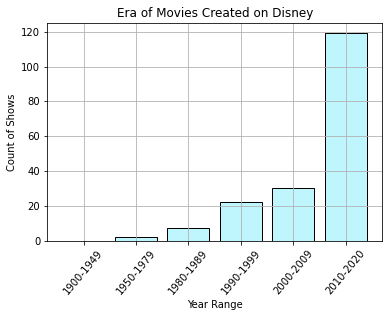

In [9]:
# Create bar chart represeting year range 

ranges = age_range_df["Age Range"].count()
plt.bar(groups, ranges, color = '#BFF5FD', edgecolor = 'black');
plt.title('Era of Movies Created on Disney');
plt.xlabel('Year Range')
plt.ylabel('Count of Shows')
plt.xticks(rotation=50);
plt.grid();
plt.savefig("../Charts/disney_eras.pdf")

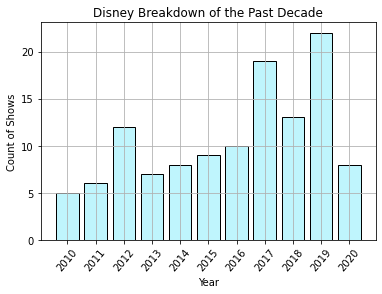

In [10]:
# Bar chart to breakdown number of movies per year in the last decade

disney_years = disney_df.groupby("Year")
disney_year_count = disney_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(top_11_years,disney_year_count['Title'], color = '#BFF5FD', edgecolor = 'black')
plt.title('Disney Breakdown of the Past Decade');
plt.xlabel('Year');
plt.ylabel('Count of Shows');
plt.xticks(rotation=50);
plt.grid();
plt.savefig("../Charts/disney_decade.pdf")

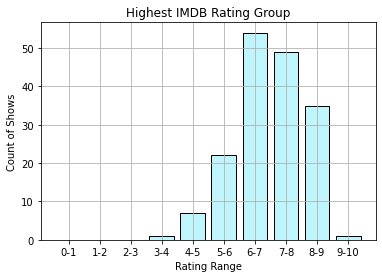

In [11]:
# Group IMDB ratings into bins to create a bar graph

bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
disney_df['IMDB Rating Ranges'] = pd.cut(disney_df['IMDB'], bins2, labels=groups2)

imdb_rating_ranges = disney_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()

plt.bar(groups2, ranges2, color = '#BFF5FD', edgecolor = 'black');
plt.title('Highest IMDB Rating Group');
plt.xlabel('Rating Range');
plt.ylabel('Count of Shows');
plt.grid();

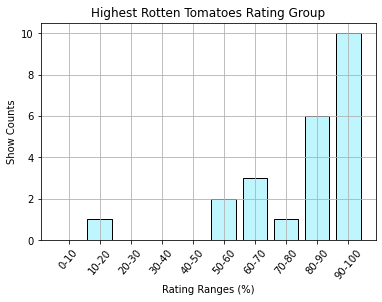

In [12]:
# Group Rotten Tomatoes ratings into bins to create a bar graph

bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
disney_df_dropped['RT Rating Ranges'] = pd.cut(disney_df_dropped['RT'], bins3, labels=groups3)

rt_rating_ranges = disney_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()

plt.bar(groups3, ranges3, color = '#BFF5FD', edgecolor = 'black');
plt.title('Highest Rotten Tomatoes Rating Group');
plt.xlabel('Rating Ranges (%)');
plt.ylabel('Show Counts');
plt.xticks(rotation=50);
plt.grid();

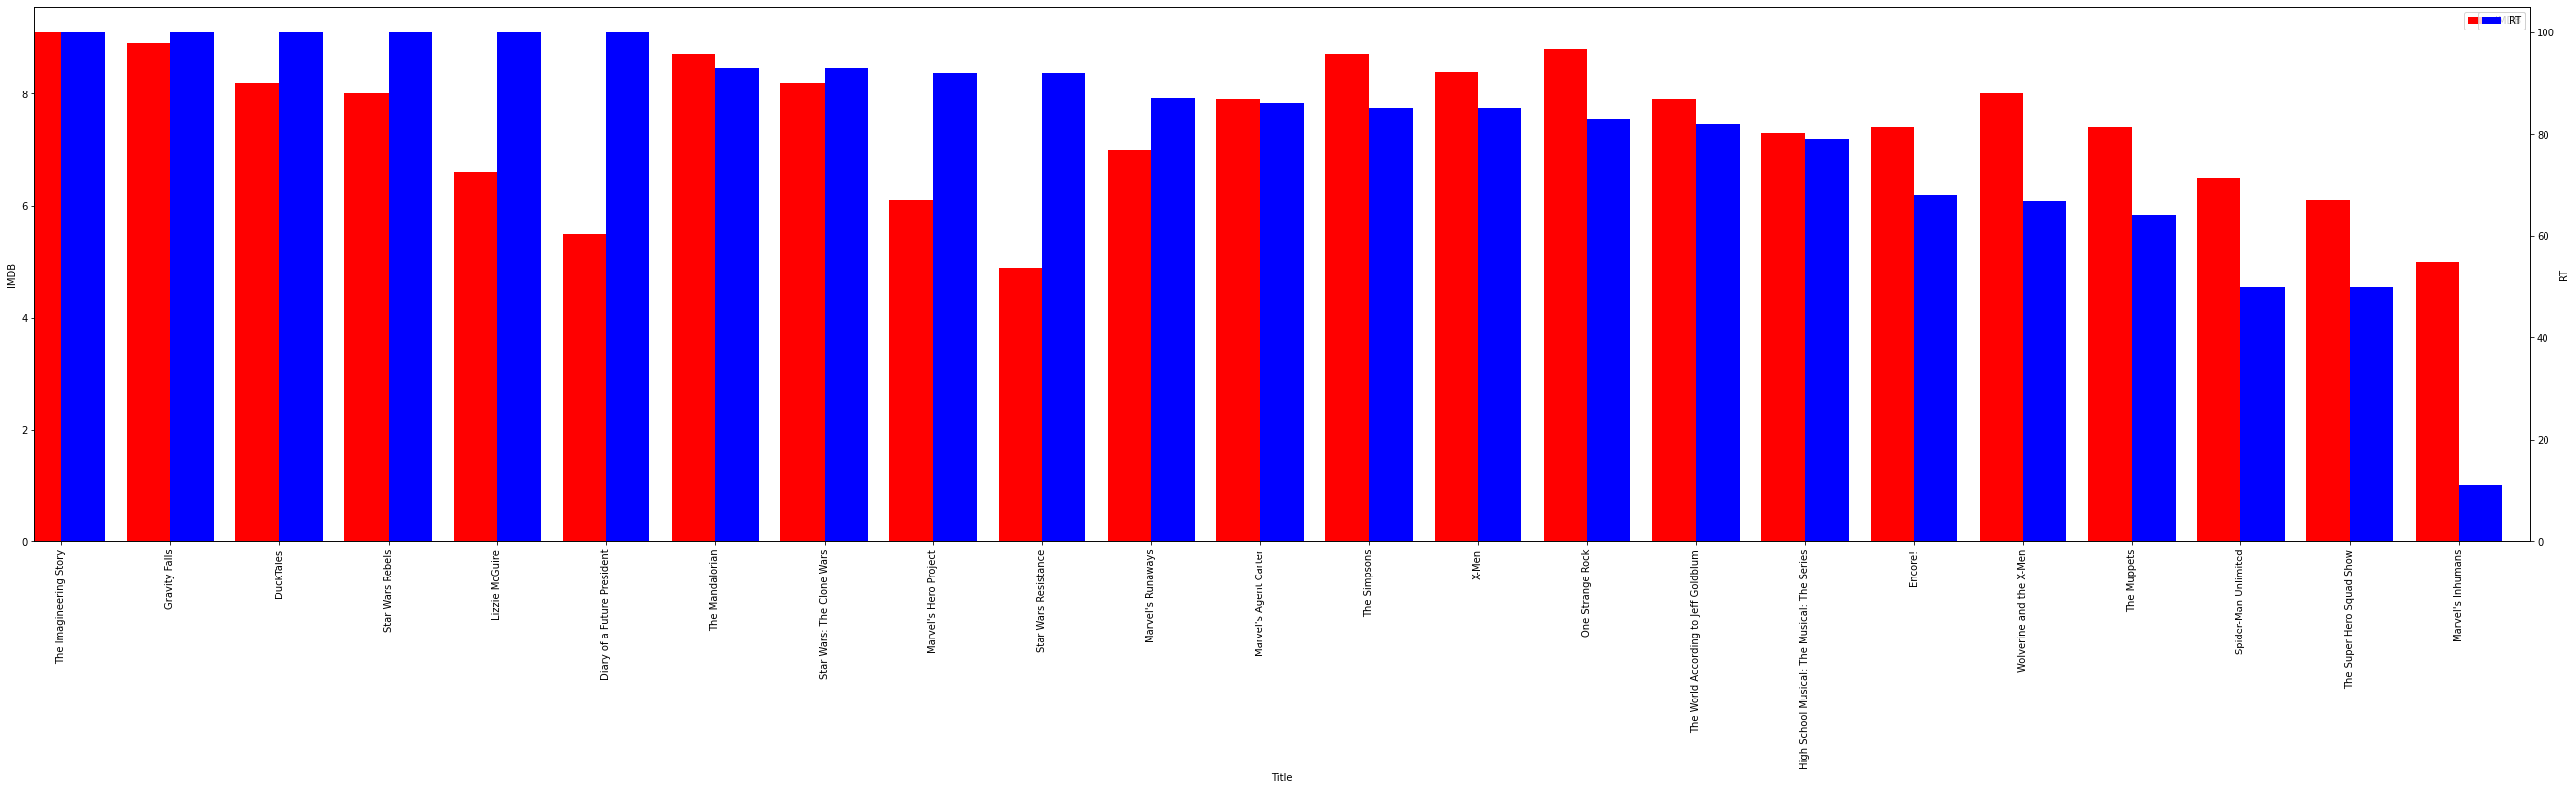

In [13]:
# Compares each show's IMDB and Rotten Tomatoes' rating

fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(121)
ax2 = ax.twinx()
width = 0.4
disney_df_dropped.IMDB.plot(kind='bar', color='red', legend = 'IMDB', ax=ax, width=width, position=1);
disney_df_dropped.RT.plot(kind='bar', color='blue', legend = 'Rotten Tomatoes', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');

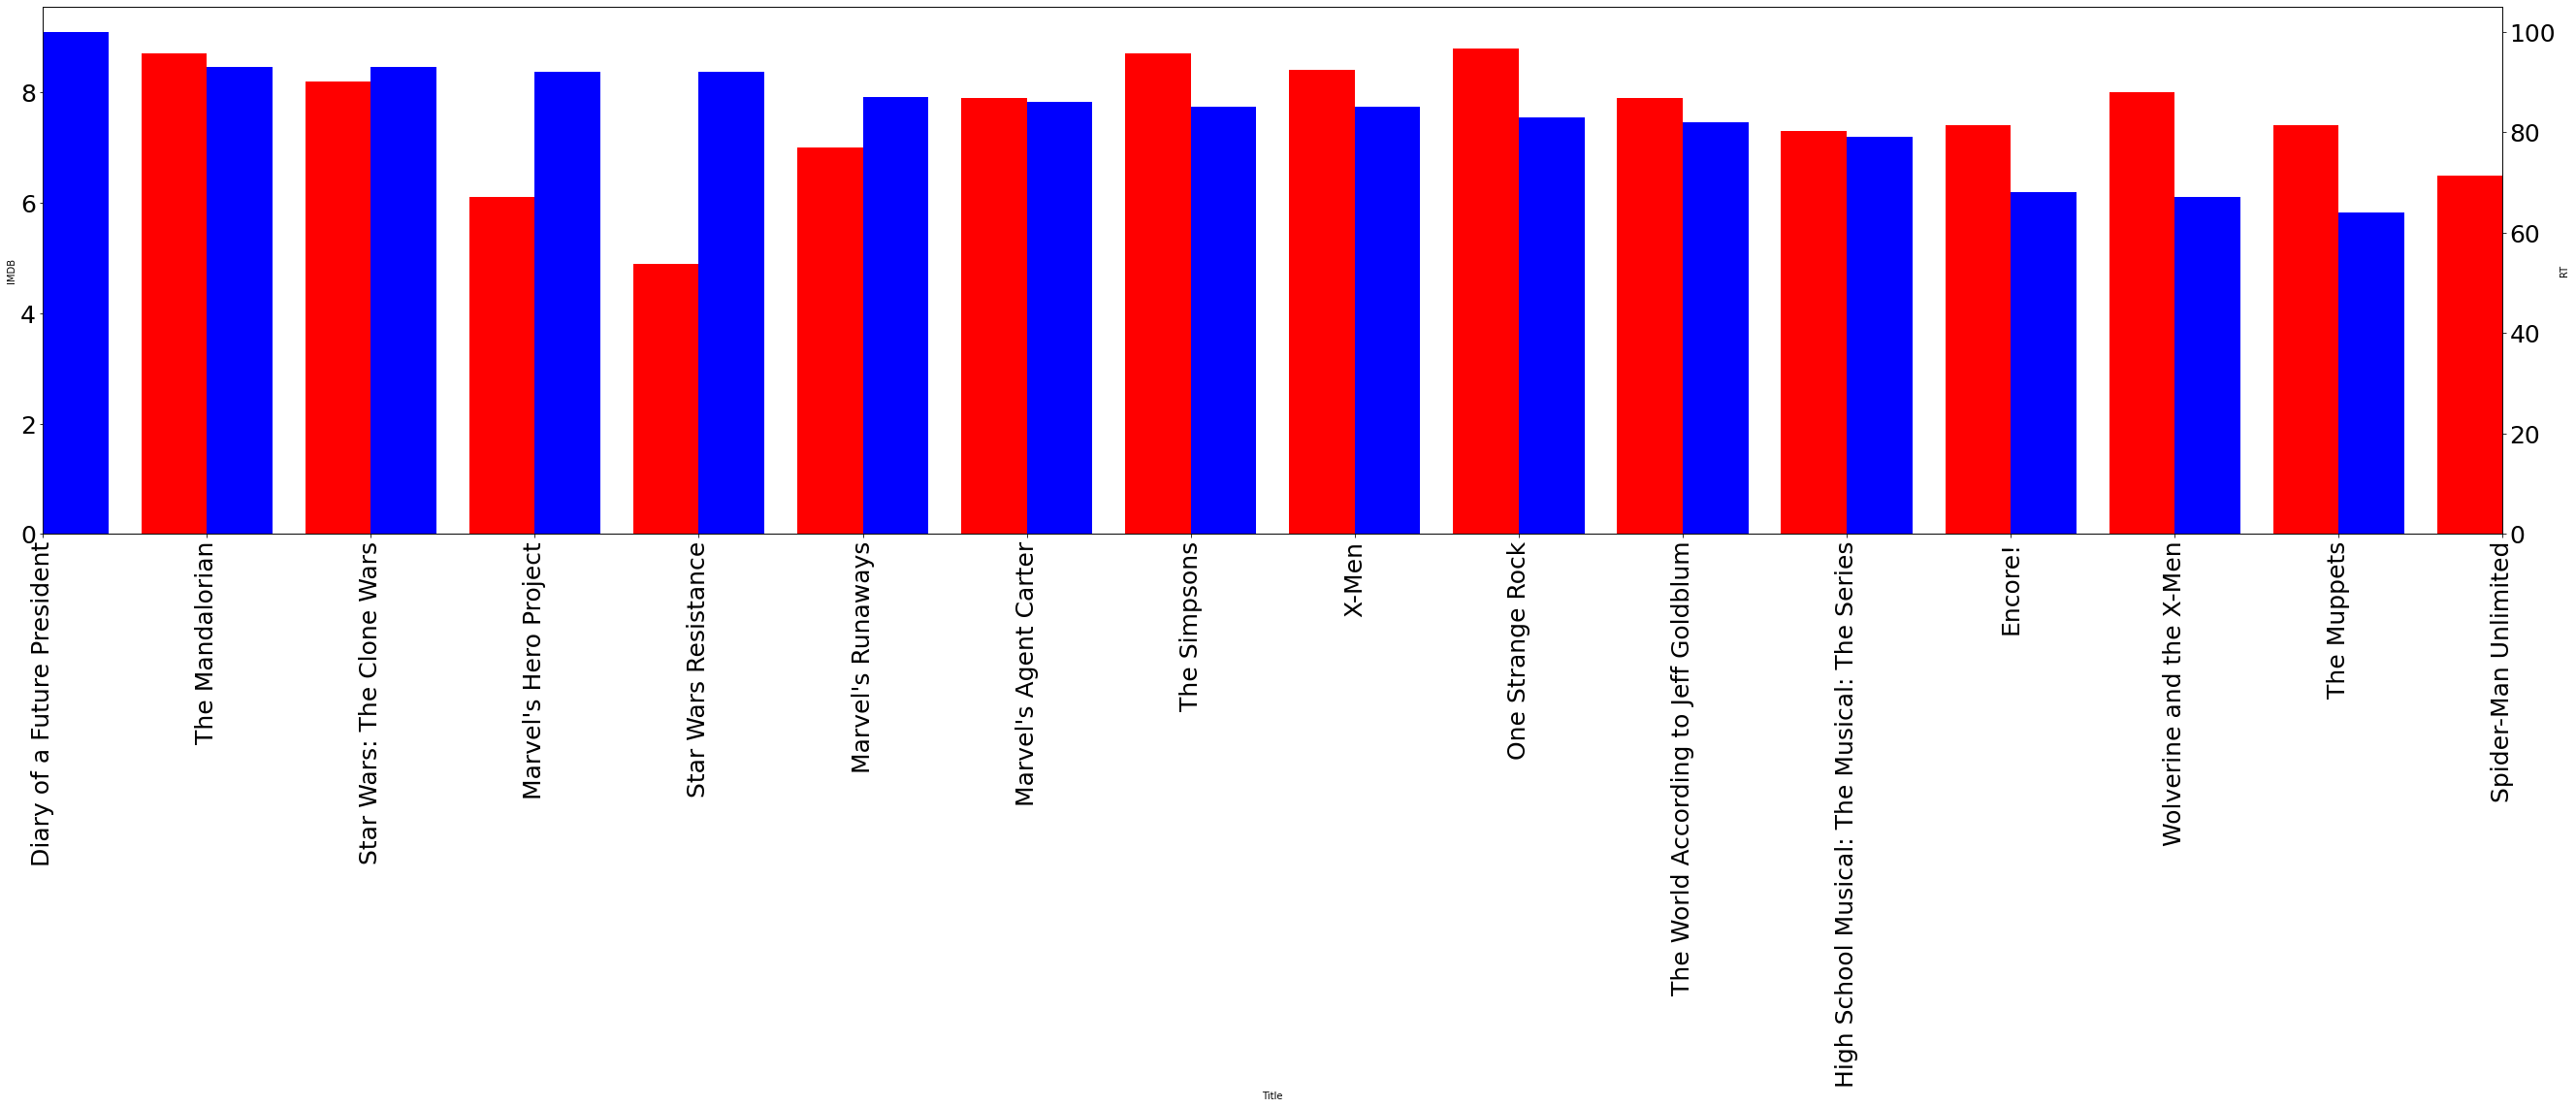

In [14]:
# Zoomed in chart of the above

fig = plt.figure(figsize=(100,10)) 
ax = fig.add_subplot(121) 
ax2 = ax.twinx()
width = 0.4
disney_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1, fontsize=25);
disney_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=25);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');
plt.xlim(5, 20);

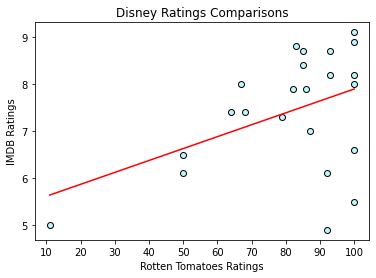

The correlation between both factors is 0.44


<Figure size 432x288 with 0 Axes>

In [15]:
# Find any correlation between IMDB & Rotten Tomatoes ratings using scatter plot

disney_RT = disney_df_dropped['RT']
disney_IMBD_ratings = disney_df_dropped['IMDB']

x_values = disney_RT
y_values = disney_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(disney_RT, disney_IMBD_ratings, facecolor='#BFF5FD', edgecolor="black");
plt.plot(x_values,regress_values,"r-")
plt.title('Disney Ratings Comparisons')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Rotten Tomatoes Ratings')
plt.ylabel('IMDB Ratings')
plt.xlim = (0,100)
plt.show()

correlation = st.pearsonr(disney_RT,disney_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("../Charts/disney_correlation.pdf")

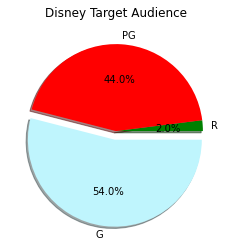

In [17]:
# Disney Target Audience pie chart

disney_age_group = disney_df.groupby("Age")
age_count = disney_age_group.count()

explode = (0,0,0.1)
labels = ['R','PG','G']
colors = ['green','red','#BFF5FD','yellow']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = colors,autopct="%1.1f%%", shadow=True);
plt.title("Disney Target Audience");
plt.savefig("../Charts/disney_audience.pdf")